In [25]:
import xarray as xr
import salem
from glob import glob
import numpy as np
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = Path("data/era5/era5_galapagos.nc4")

In [393]:
ds = xr.open_dataset(data)
ds = ds.drop_sel(expver= 5)
ds = ds.drop('expver')
ds['ws10'] = np.sqrt(ds.u10**2 + ds.v10**2 )

In [394]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 13, time: 515, expver: 1)
Coordinates:
  * longitude  (longitude) float32 -92.0 -91.75 -91.5 ... -89.5 -89.25 -89.0
  * latitude   (latitude) float32 1.2 0.95 0.7 0.45 ... -1.05 -1.3 -1.55 -1.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-11-01
Dimensions without coordinates: expver
Data variables:
    u10        (time, expver, latitude, longitude) float32 -0.3185 ... nan
    v10        (time, expver, latitude, longitude) float32 2.972 2.81 ... nan
    t2m        (time, expver, latitude, longitude) float32 ...
    e          (time, expver, latitude, longitude) float32 ...
    sst        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
    ws10       (time, expver, latitude, longitude) float32 2.989 2.842 ... nan
Attributes:
    Conventions:  CF-1.6
    history:      2021-12-13 08:20:54 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [395]:
ds["tp"] = ds.tp * 1000 * 12
ds["e"] = ds.e * 1000 * 12
ds["sst"] = ds.sst - 273.15
ds["t2m"] = ds.t2m - 273.15
monthly_means = ds.groupby("time.month").mean()
yearly_means = ds.groupby("time.year").mean()

# Temperatures

Text(0, 0.5, '2m-temperature in degC')

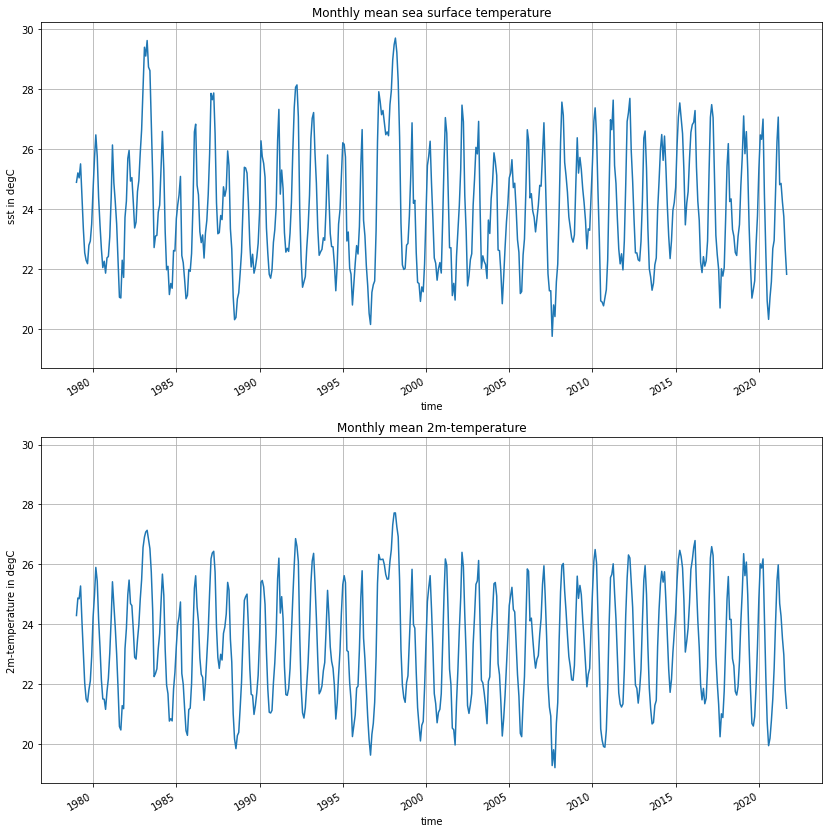

In [378]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,1,1)
plt.grid()
ds.sst.mean(('latitude', 'longitude')).plot()
plt.title("Monthly mean sea surface temperature")
plt.ylabel("sst in degC")
fig.add_subplot(2,1,2, sharey=ax1, sharex=ax1)
plt.grid()
ds.t2m.mean(('latitude', 'longitude')).plot()
plt.title("Monthly mean 2m-temperature")
plt.ylabel("2m-temperature in degC")

## SST monthmean

<Figure size 1008x1008 with 0 Axes>

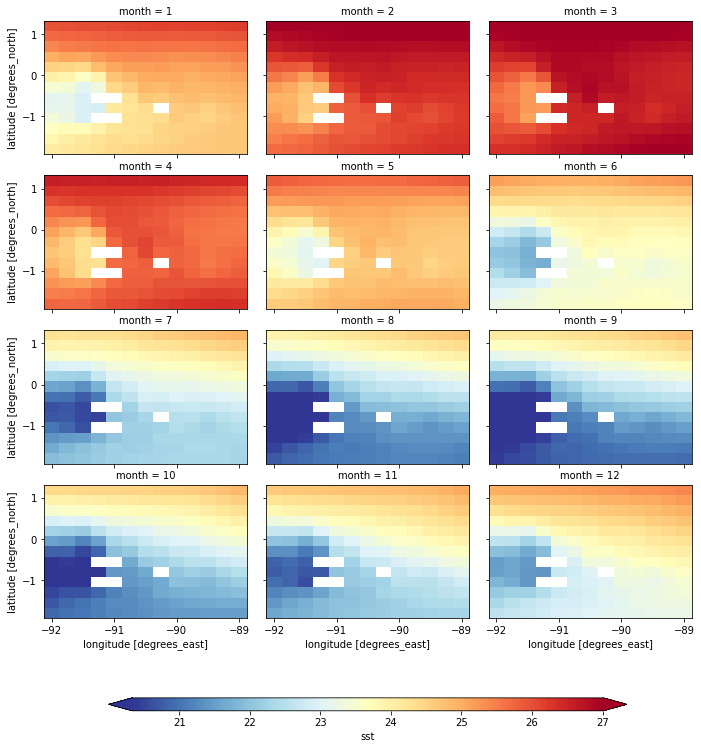

In [364]:
fig = plt.figure(figsize=(14,14))
monthly_means.sst.plot(
    col="month",
    col_wrap=3,
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

# Precipitation and Evaporation

Text(0, 0.5, 'net precipitation in mm per month')

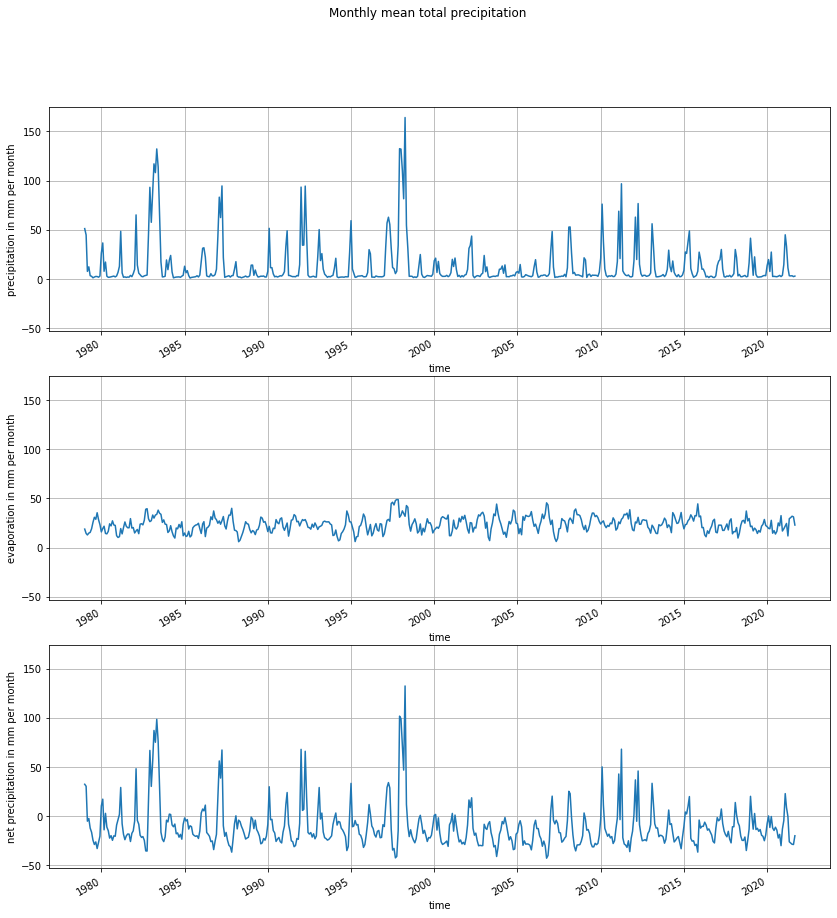

In [411]:
fig = plt.figure(figsize=(14,14))
plt.suptitle("Monthly mean total precipitation")
ax1 = fig.add_subplot(3,1,1)
plt.grid()
ds.tp.mean(('latitude', 'longitude')).plot()
plt.ylabel("precipitation in mm per month")
fig.add_subplot(3,1,2, sharey=ax1, sharex=ax1)
plt.grid()
(ds.e.mean(('latitude', 'longitude')) * (-1)).plot()
plt.ylabel("evaporation in mm per month")
fig.add_subplot(3,1,3, sharey=ax1, sharex=ax1)
plt.grid()
(ds.tp.mean(('latitude', 'longitude')) + ds.e.mean(('latitude', 'longitude'))).plot()
plt.ylabel("net precipitation in mm per month")

# Wind components

Text(0, 0.5, 'ws10 in ms-1')

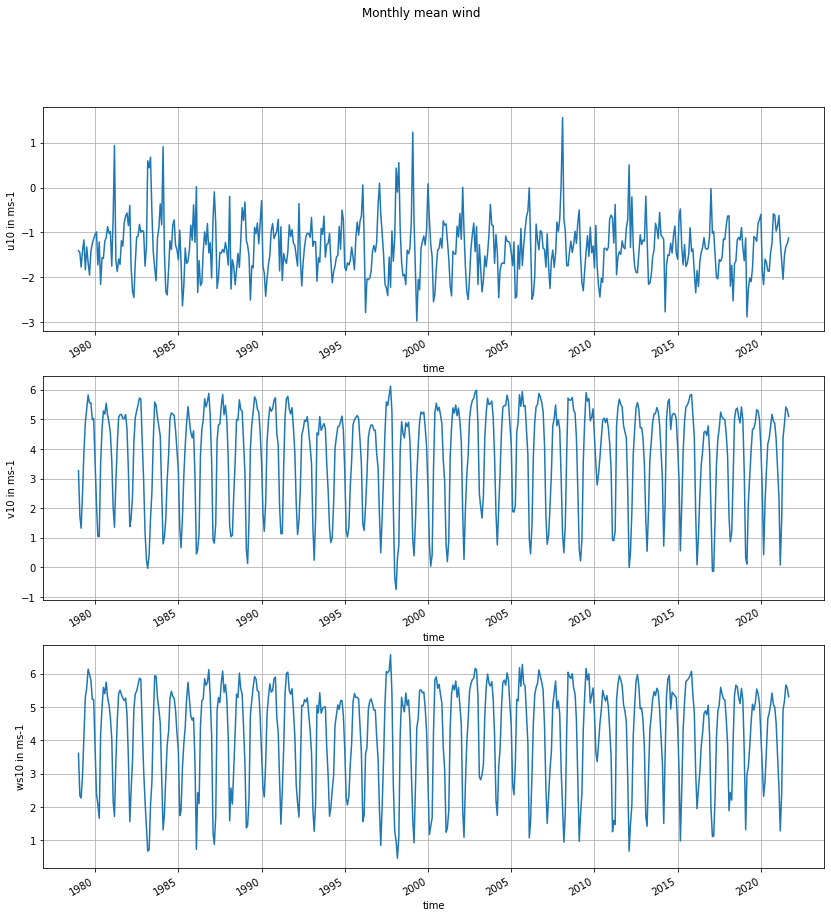

In [382]:
fig = plt.figure(figsize=(14,14))
plt.suptitle("Monthly mean wind")
ax1 = fig.add_subplot(3,1,1)
plt.grid()
ds.u10.mean(('latitude', 'longitude')).plot()
plt.ylabel("u10 in ms-1")
fig.add_subplot(3,1,2, sharex=ax1)
plt.grid()
ds.v10.mean(('latitude', 'longitude')).plot()
plt.ylabel("v10 in ms-1")
fig.add_subplot(3,1,3, sharex=ax1)
plt.grid()
ds.ws10.mean(('latitude', 'longitude')).plot()
plt.ylabel("ws10 in ms-1")

# Maps of time means

Text(0.5, 1.0, 'Mean 2m-temp in degC')

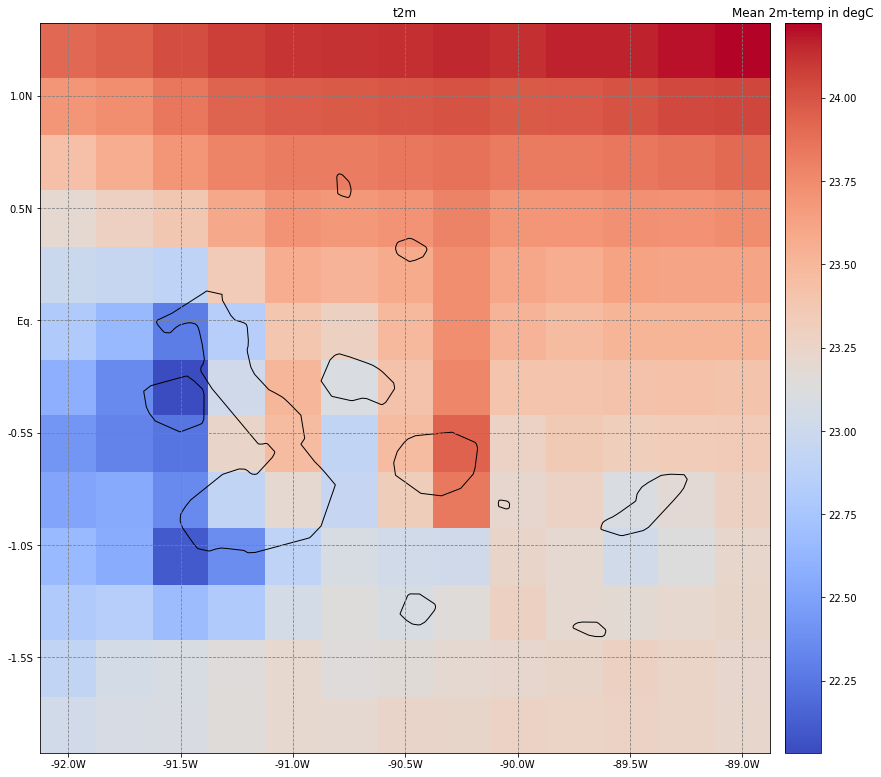

In [383]:
fig = plt.figure(figsize=(14,14))
ds.t2m.mean('time').salem.quick_map(cmap='coolwarm')
plt.title("Mean 2m-temp in degC")

Text(0.5, 1.0, 'Mean SST in degC')

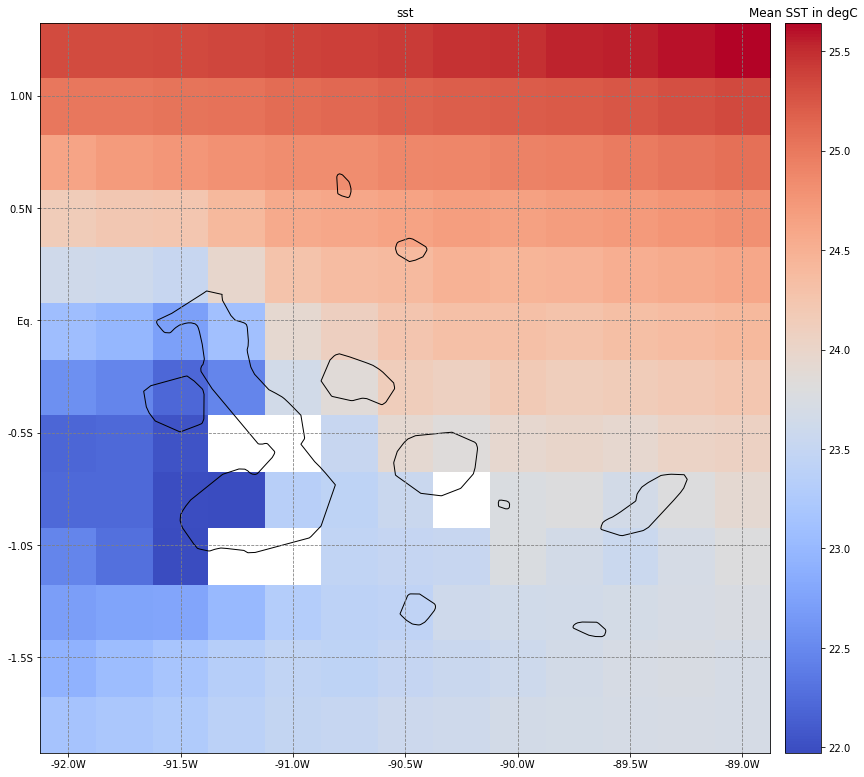

In [216]:
fig = plt.figure(figsize=(14,14))
ds.sst.mean('time').salem.quick_map(cmap='coolwarm')
plt.title("Mean SST in degC")

Text(0.5, 1.0, 'Mean total precipitation in mm month-1')

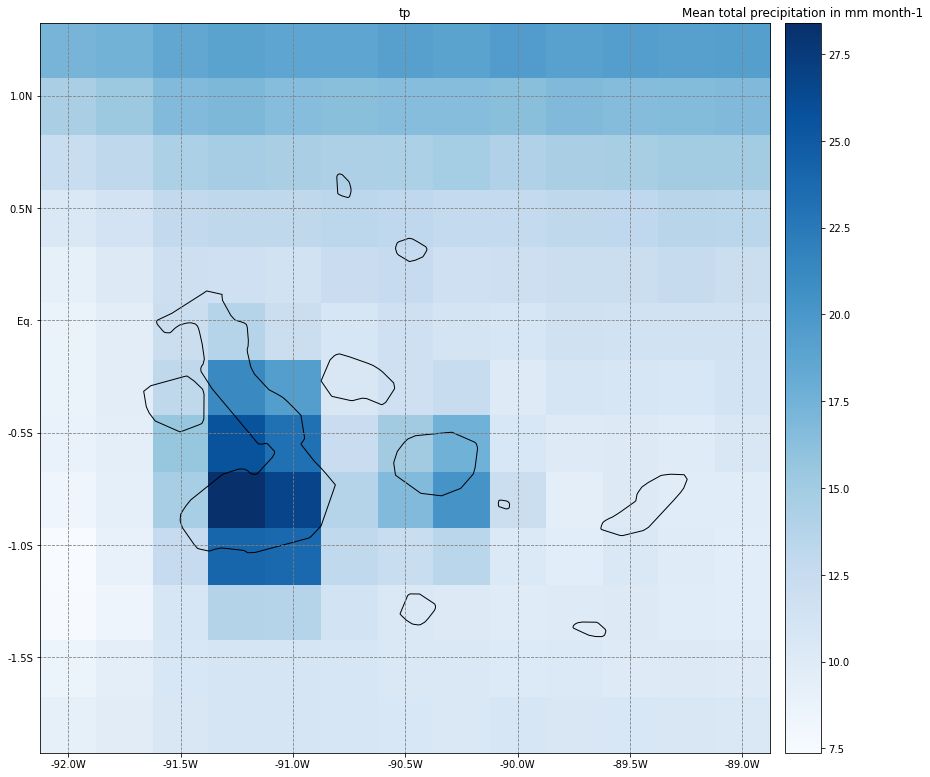

In [218]:
fig = plt.figure(figsize=(14,14))
ds.tp.mean('time').salem.quick_map(cmap='Blues')
plt.title("Mean total precipitation in mm month-1")

Text(0.5, 1.0, 'Mean total evaporation in mm y-1')

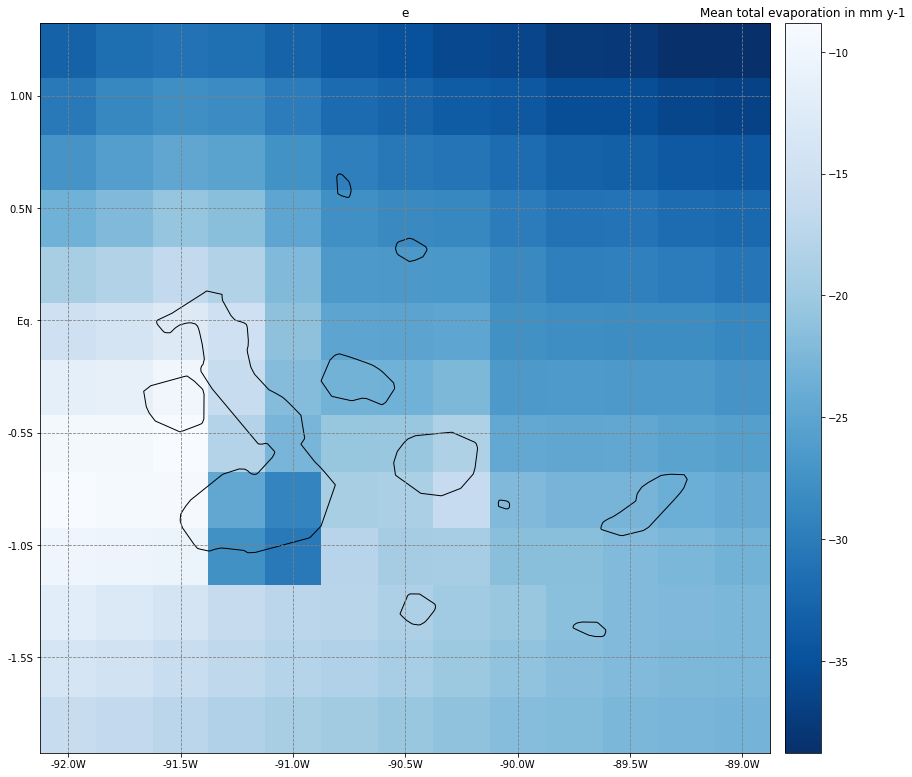

In [384]:
fig = plt.figure(figsize=(14,14))
ds.e.mean('time').salem.quick_map(cmap='Blues_r')
plt.title("Mean total evaporation in mm y-1")

Text(0.5, 1.0, '10 m wind speed in ms-1')

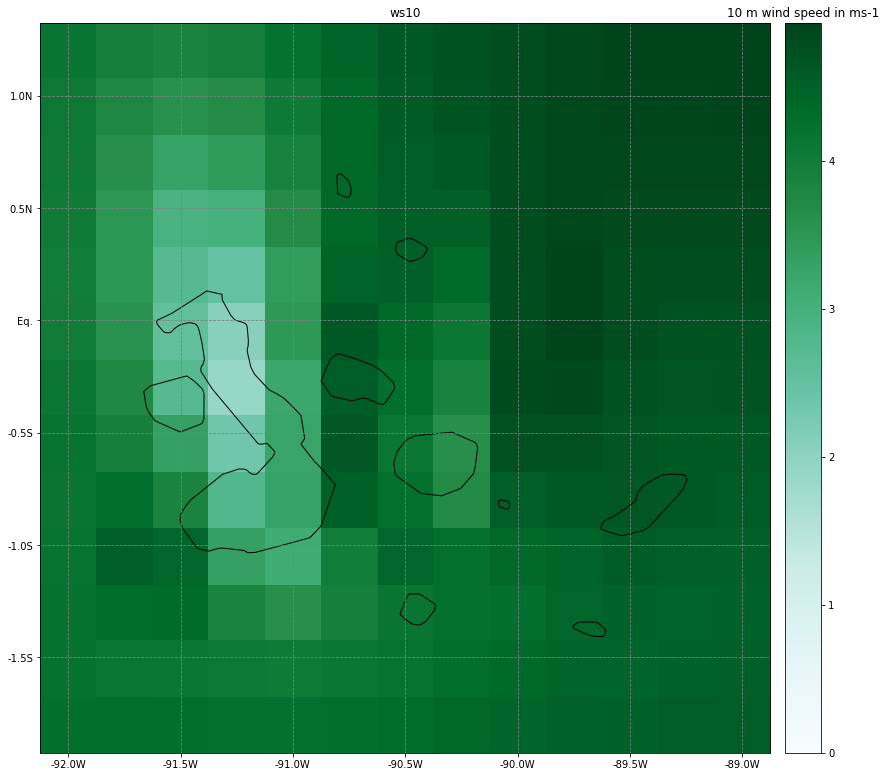

In [385]:
fig = plt.figure(figsize=(14,14))
ds.ws10.mean('time').salem.quick_map(cmap='BuGn', vmin=0)
plt.title("10 m wind speed in ms-1")

# Yearly means maps
# SST

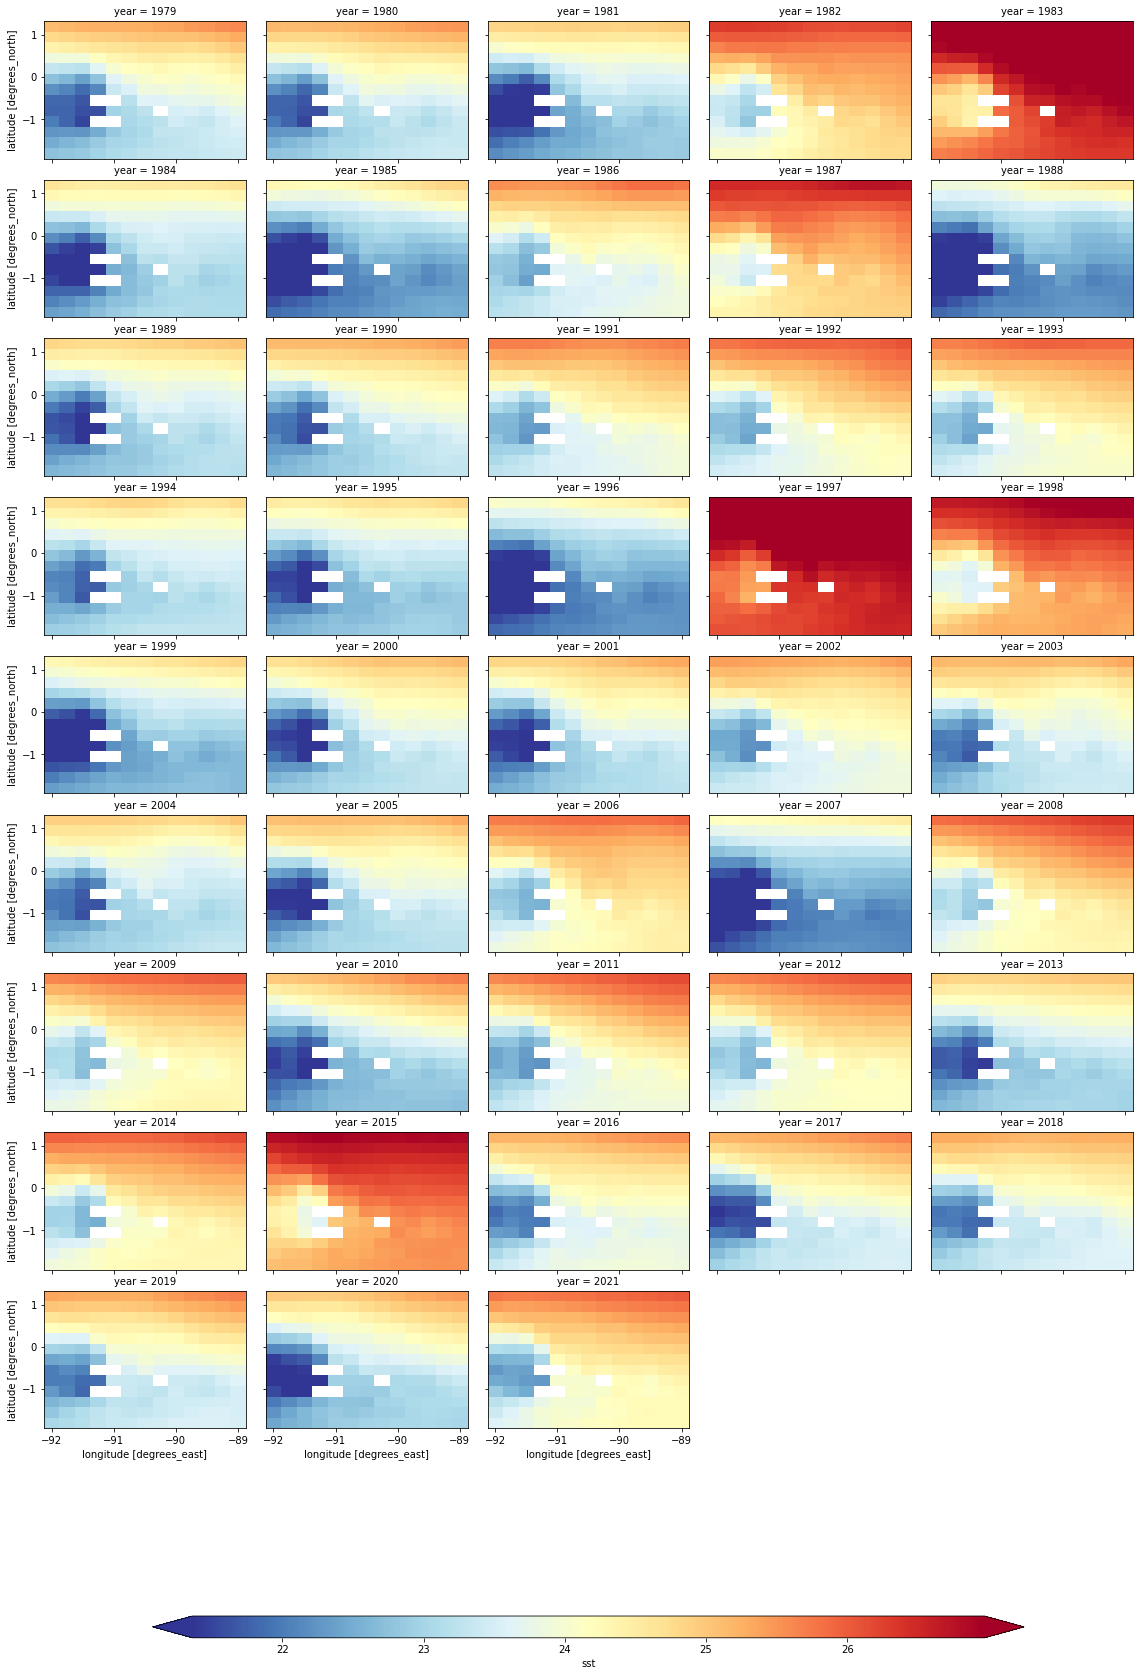

In [233]:
fg = yearly_means.sst.plot(
    col="year",
    col_wrap=5,
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

# 2m temperature

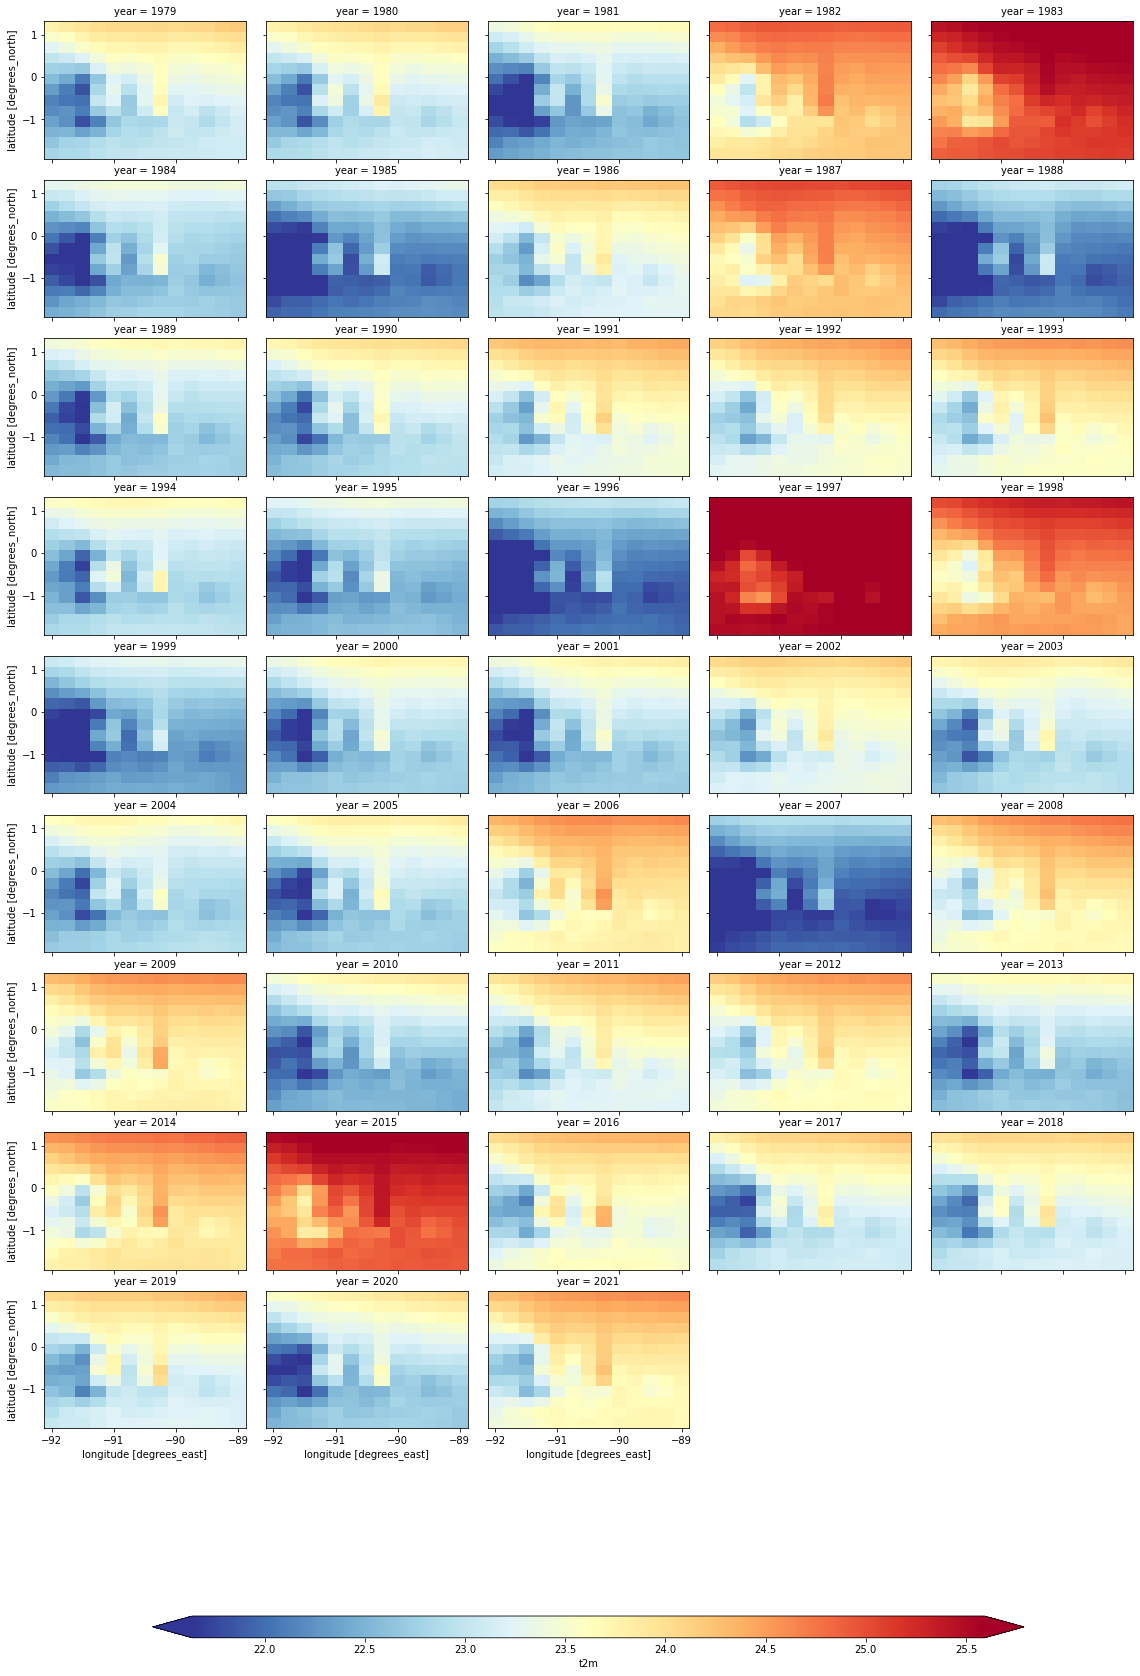

In [387]:
fg = yearly_means.t2m.plot(
    col="year",
    col_wrap=5,
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

# total precipitation

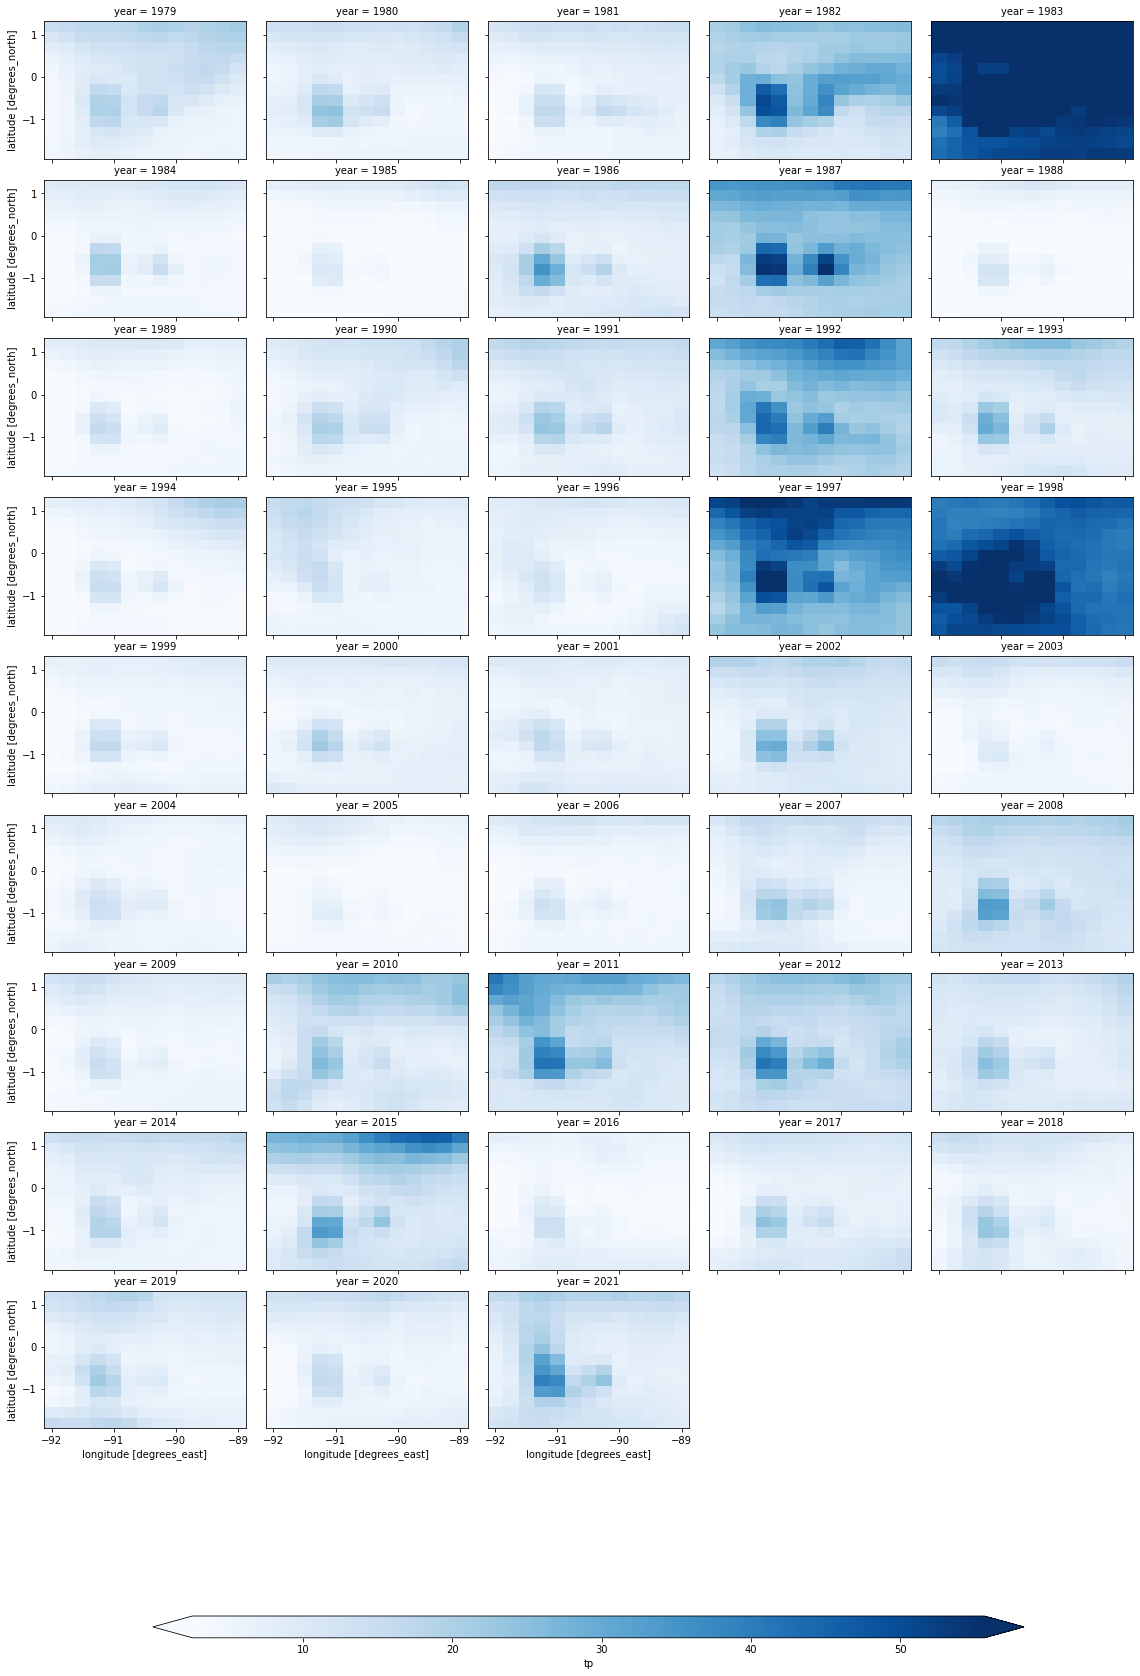

In [406]:
fg = yearly_means.tp.plot(
    col="year",
    col_wrap=5,
    robust=True,
    cmap=mpl.cm.Blues,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

# Evaporation

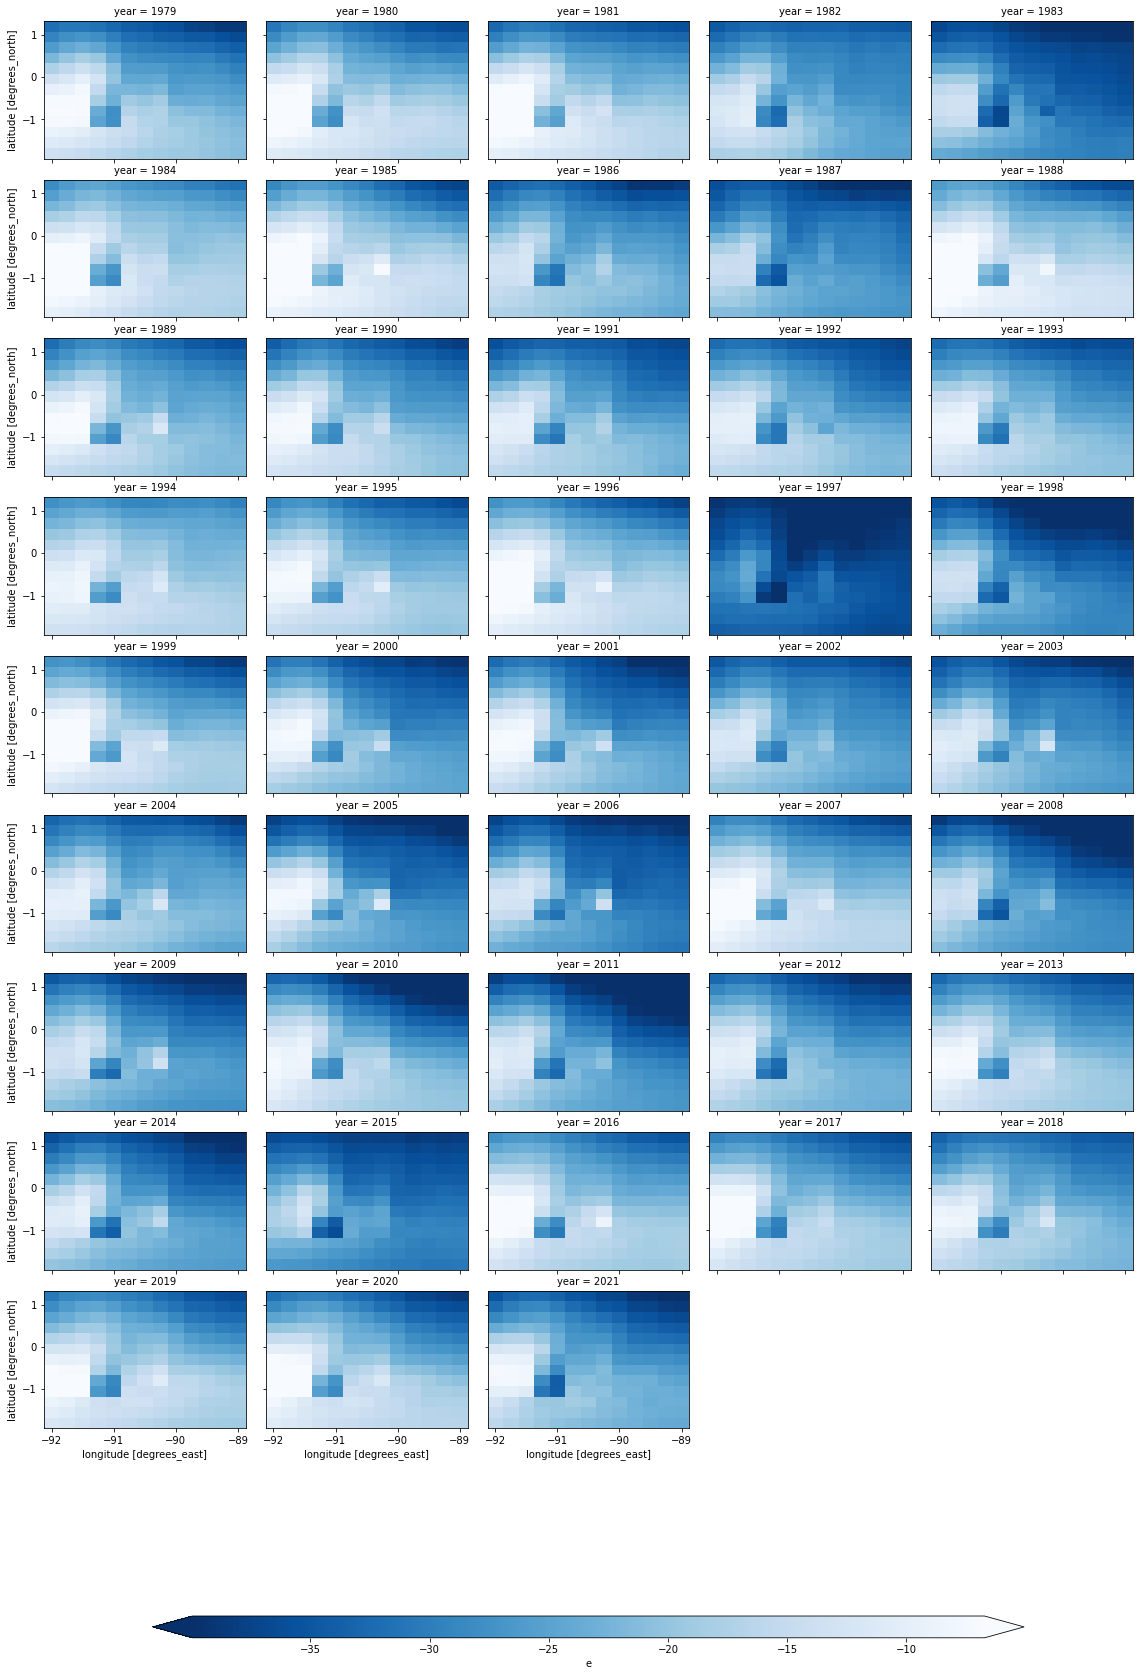

In [405]:
fg = yearly_means.e.plot(
    col="year",
    col_wrap=5,
    robust=True,
    cmap=mpl.cm.Blues_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

# Wind speed

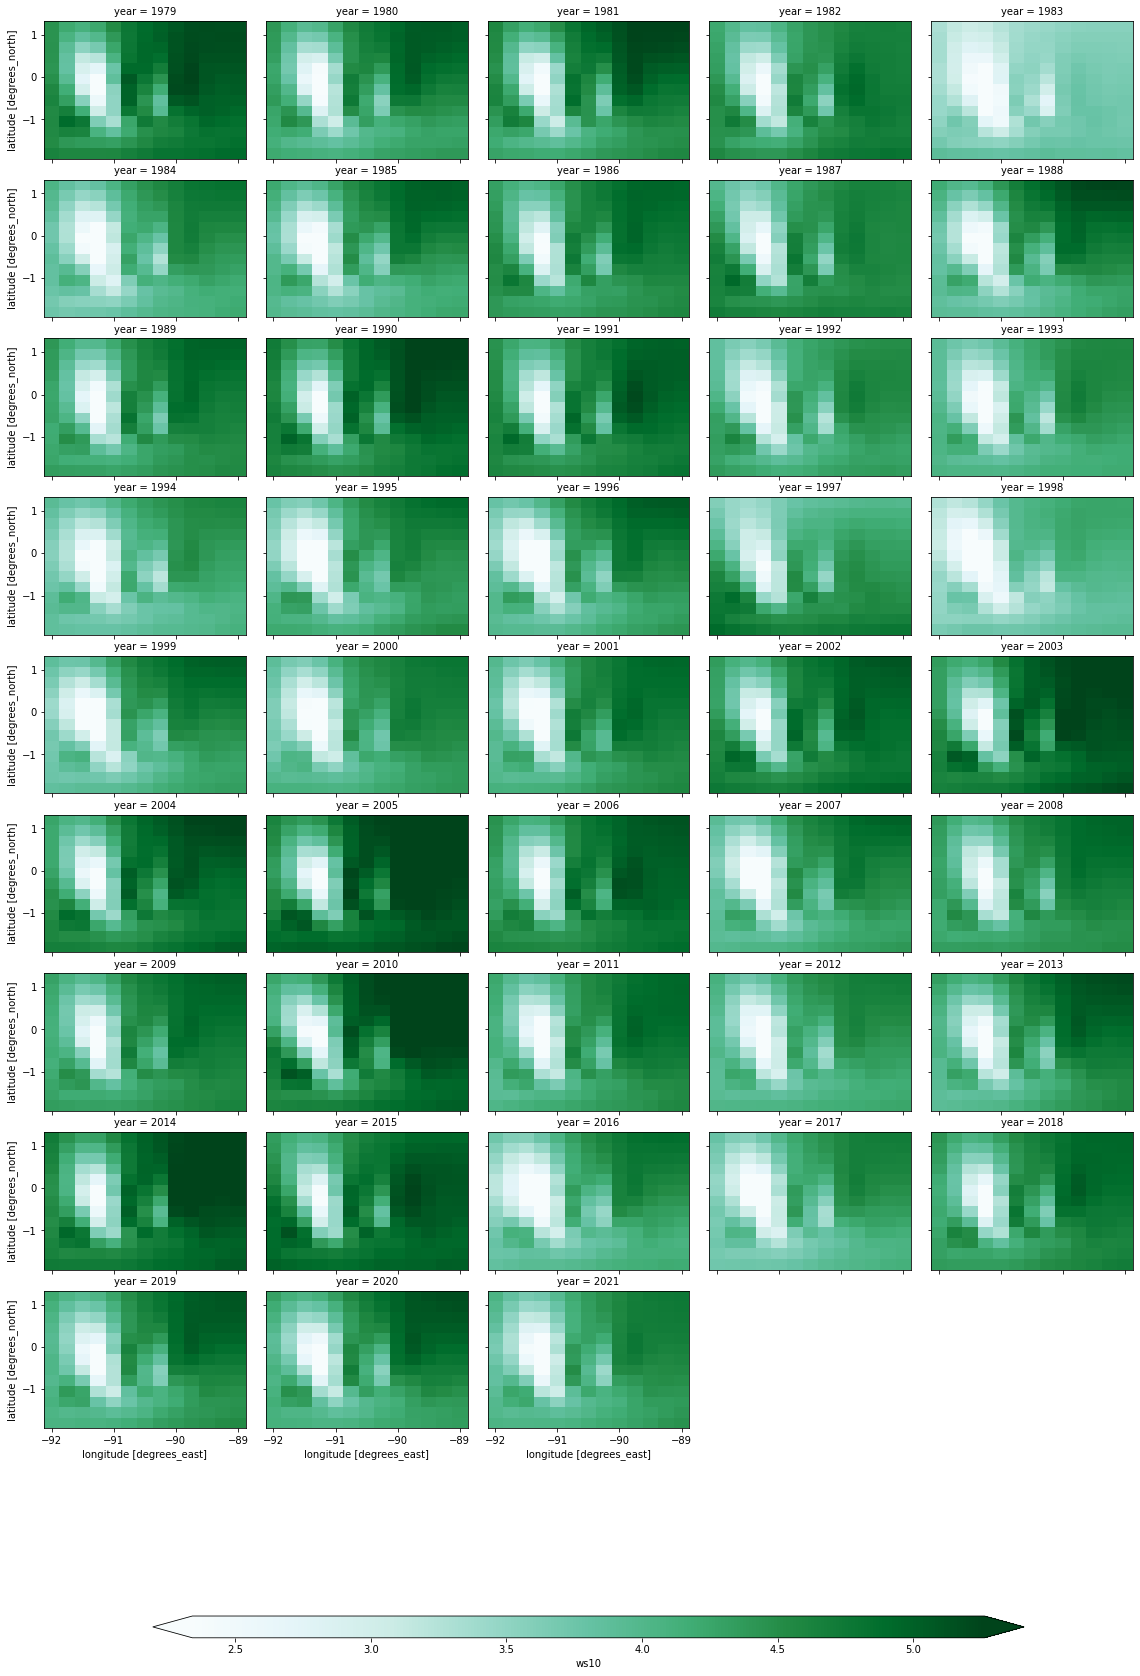

In [407]:
fg = yearly_means.ws10.plot(
    col="year",
    col_wrap=5,
    robust=True,
    cmap=mpl.cm.BuGn,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

# yearly cycle

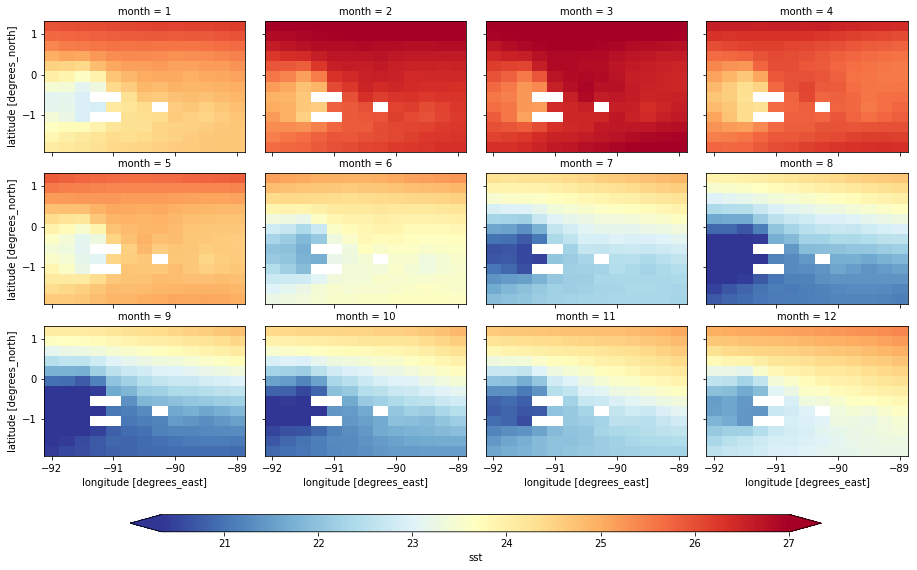

In [398]:
monthly_means.sst.plot(
    col="month",
    col_wrap=4,
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

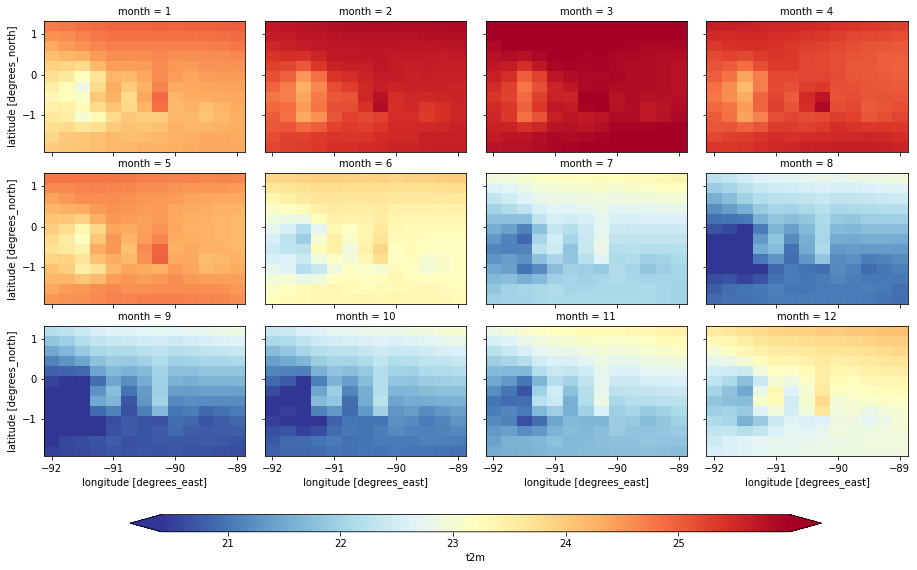

In [399]:
monthly_means.t2m.plot(
    col="month",
    col_wrap=4,
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

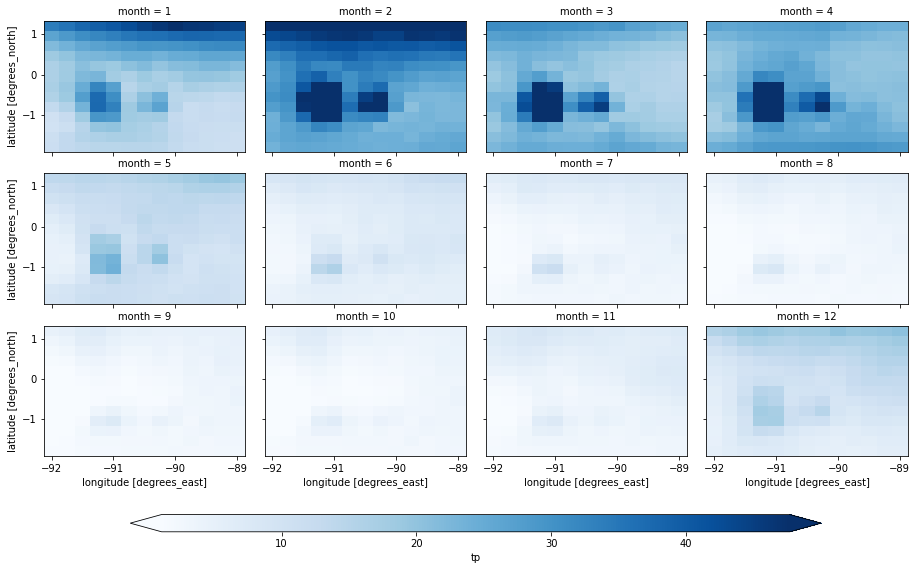

In [404]:
monthly_means.tp.plot(
    col="month",
    col_wrap=4,
    robust=True,
    cmap=mpl.cm.Blues,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

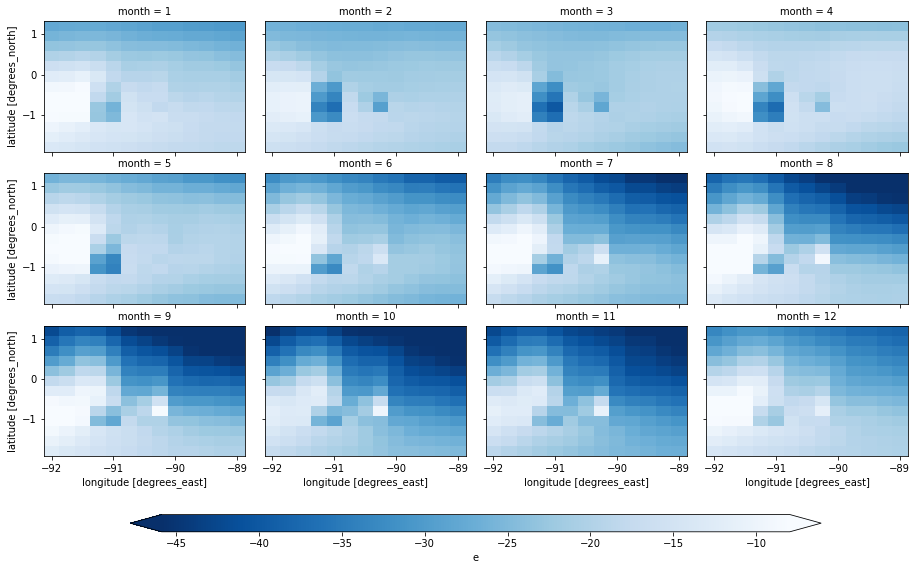

In [403]:
monthly_means.e.plot(
    col="month",
    col_wrap=4,
    robust=True,
    cmap=mpl.cm.Blues_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

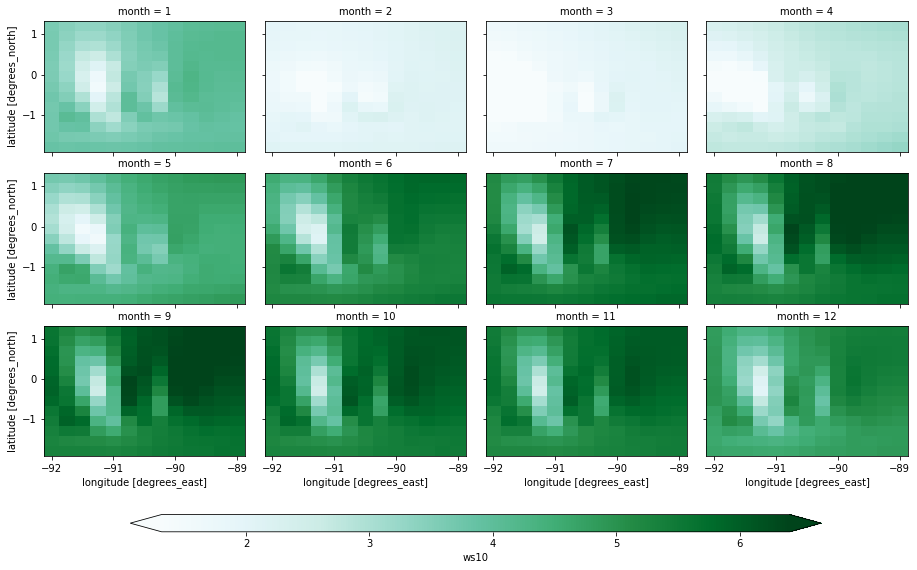

In [408]:
monthly_means.ws10.plot(
    col="month",
    col_wrap=4,
    robust=True,
    cmap=mpl.cm.BuGn,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

## Southern Oscillation Index

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.cgd.ucar.edu%2Fcas%2Fcatalog%2Fclimind%2Fsoi4a.gif&f=1&nofb=1">

# Situation during El Nino 1982-10 to 1983-12 and La Nina 2006-10 to 2007-12

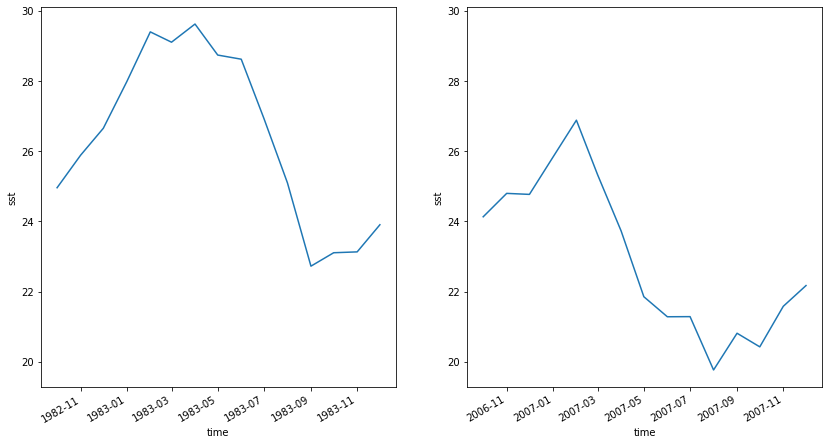

In [283]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(1, 2, 1)
(ds.sst[12*4-3:12*5, :, :]).mean(('latitude', 'longitude')).plot()
fig.add_subplot(1, 2, 2, sharey=ax1)
(ds.sst[12*28-3:12*29, :, :]).mean(('latitude', 'longitude')).plot()

Text(0.5, 1.0, 'SST difference EN-LN in degC')

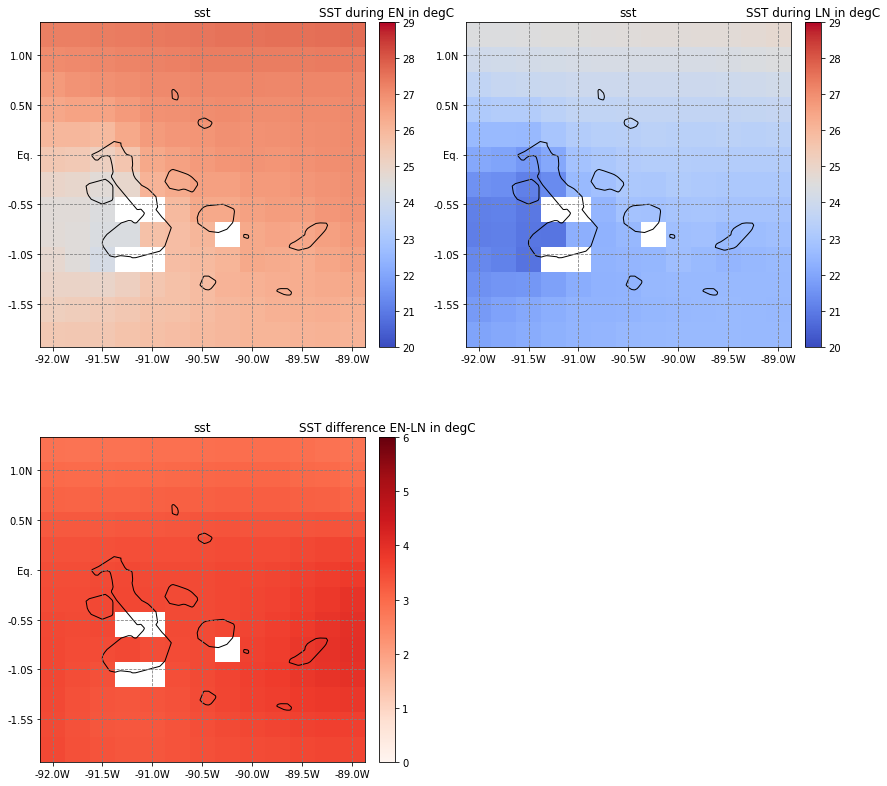

In [282]:
fig = plt.figure(figsize=(14,14))
fig.add_subplot(2, 2, 1)
ds.sst[12*4-3:12*5, :, :].mean('time').salem.quick_map(
    cmap='coolwarm', 
    vmin=20, 
    vmax=29
)
plt.title("SST during EN in degC")
fig.add_subplot(2, 2, 2)
ds.sst[12*28-3:12*29, :, :].mean('time').salem.quick_map(
    cmap='coolwarm', 
    vmin=20, 
    vmax=29
)
plt.title("SST during LN in degC")
fig.add_subplot(2, 2, 3)
(ds.sst[12*4-3:12*5, :, :].mean('time') - ds.sst[12*28-3:12*29, :, :].mean('time')).salem.quick_map(
    cmap='Reds', 
    vmin=0, 
    vmax=6
)
plt.title("SST difference EN-LN in degC")

Text(0.5, 1.0, 'SST difference EN-LN in degC')

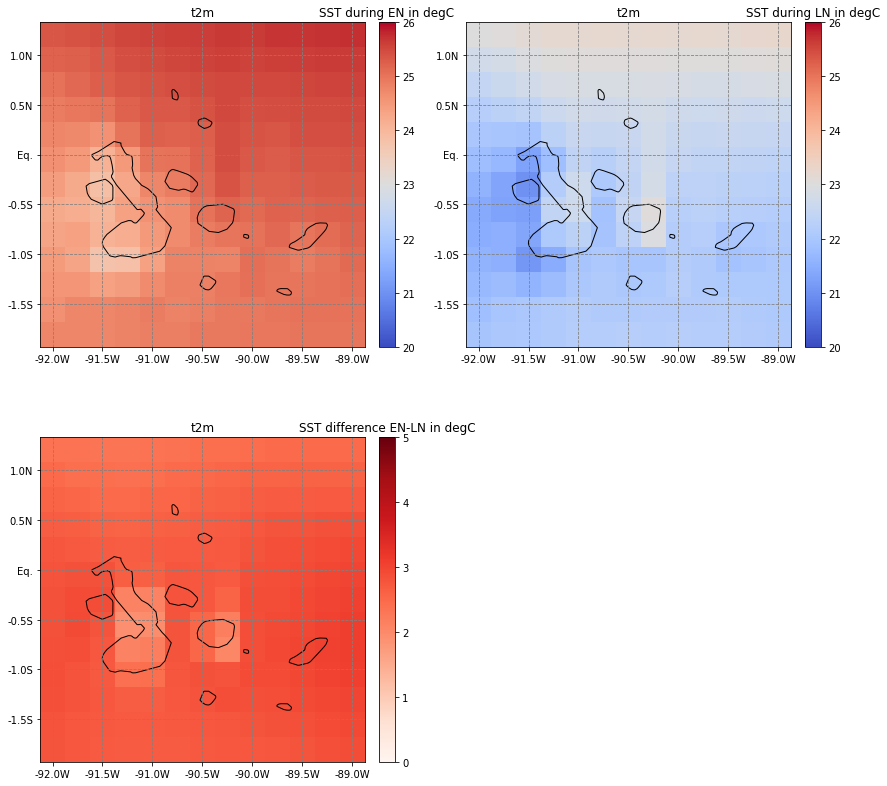

In [288]:
fig = plt.figure(figsize=(14,14))
fig.add_subplot(2, 2, 1)
ds.t2m[12*4-3:12*5, :, :].mean('time').salem.quick_map(
    cmap='coolwarm', 
    vmin=20, 
    vmax=26
)
plt.title("SST during EN in degC")
fig.add_subplot(2, 2, 2)
ds.t2m[12*28-3:12*29, :, :].mean('time').salem.quick_map(
    cmap='coolwarm', 
    vmin=20, 
    vmax=26
)
plt.title("SST during LN in degC")
fig.add_subplot(2, 2, 3)
(ds.t2m[12*4-3:12*5, :, :].mean('time') - ds.t2m[12*28-3:12*29, :, :].mean('time')).salem.quick_map(
    cmap='Reds', 
    vmin=0, 
    vmax=5
)
plt.title("SST difference EN-LN in degC")

Text(0.5, 1.0, 'TP difference EN-LN in mm m-1')

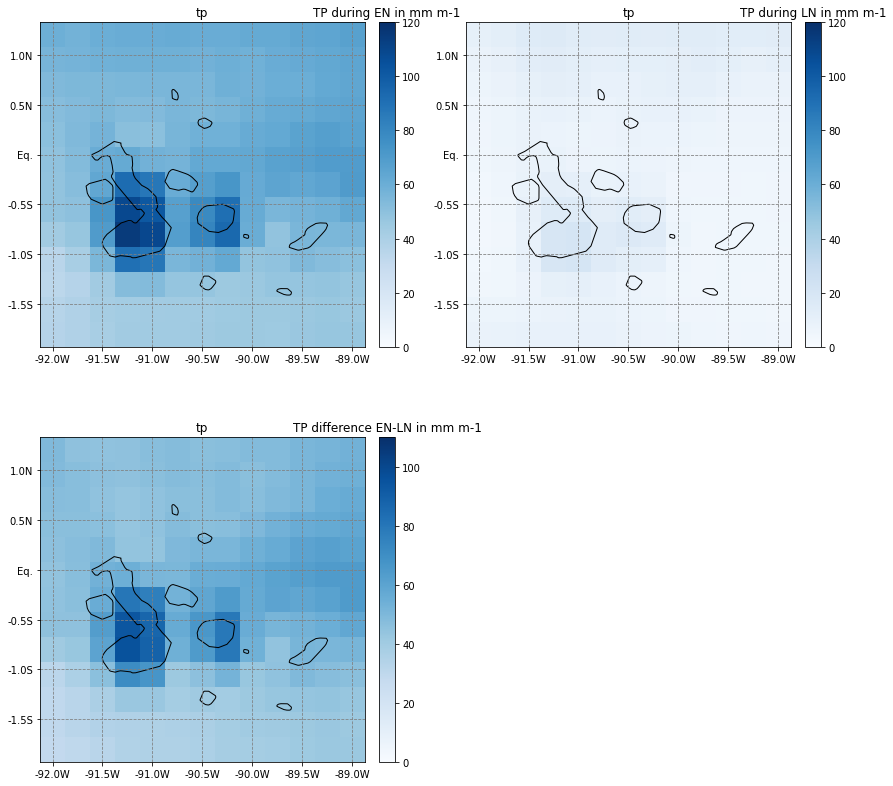

In [291]:
fig = plt.figure(figsize=(14,14))
fig.add_subplot(2, 2, 1)
ds.tp[12*4-3:12*5, :, :].mean('time').salem.quick_map(
    cmap='Blues',
    vmax=120,
    vmin=0
)
plt.title("TP during EN in mm m-1")
fig.add_subplot(2, 2, 2)
ds.tp[12*28-3:12*29, :, :].mean('time').salem.quick_map(
    cmap='Blues',
    vmax=120,
    vmin=0
)
plt.title("TP during LN in mm m-1")
fig.add_subplot(2, 2, 3)
(ds.tp[12*4-3:12*5, :, :].mean('time') - ds.tp[12*28-3:12*29, :, :].mean('time')).salem.quick_map(
    cmap='Blues',
    vmax=110,
    vmin=0
)
plt.title("TP difference EN-LN in mm m-1")

Text(0.5, 1.0, 'E difference EN-LN in mm m-1')

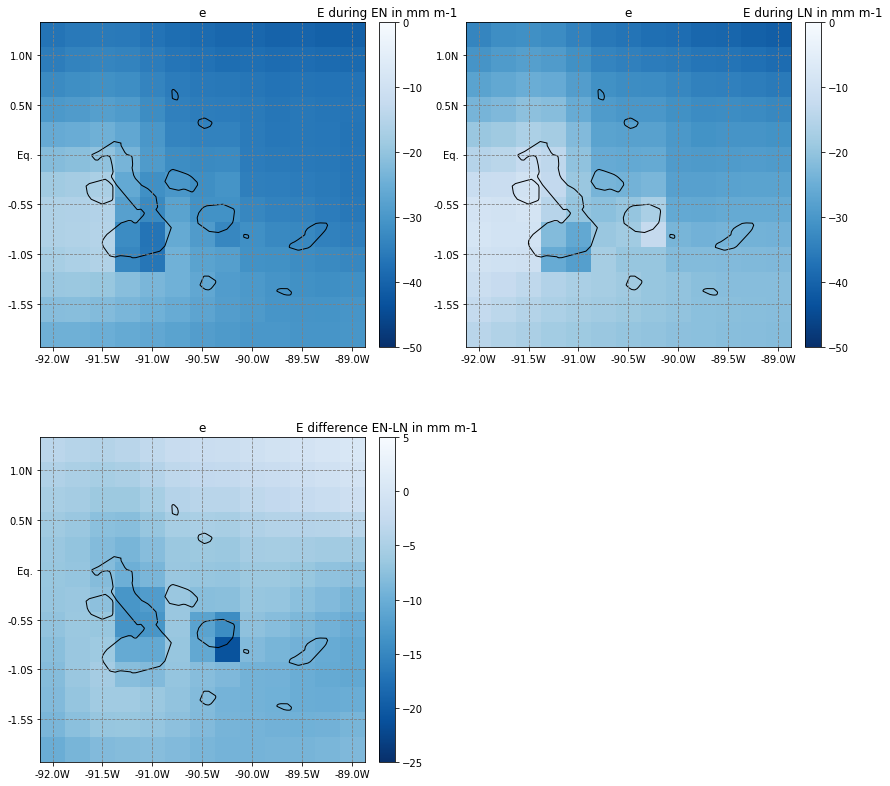

In [303]:
fig = plt.figure(figsize=(14,14))
fig.add_subplot(2, 2, 1)
ds.e[12*4-3:12*5, :, :].mean('time').salem.quick_map(
    cmap='Blues_r',
    vmax=0,
    vmin=-50
)
plt.title("E during EN in mm m-1")
fig.add_subplot(2, 2, 2)
ds.e[12*28-3:12*29, :, :].mean('time').salem.quick_map(
    cmap='Blues_r',
    vmax=0,
    vmin=-50
)
plt.title("E during LN in mm m-1")
fig.add_subplot(2, 2, 3)
(ds.e[12*4-3:12*5, :, :].mean('time') - ds.e[12*28-3:12*29, :, :].mean('time')).salem.quick_map(
    cmap='Blues_r',
    vmax=5,
    vmin=-25
)
plt.title("E difference EN-LN in mm m-1")

Text(0.5, 1.0, 'WS10 difference EN-LN in mm m-1')

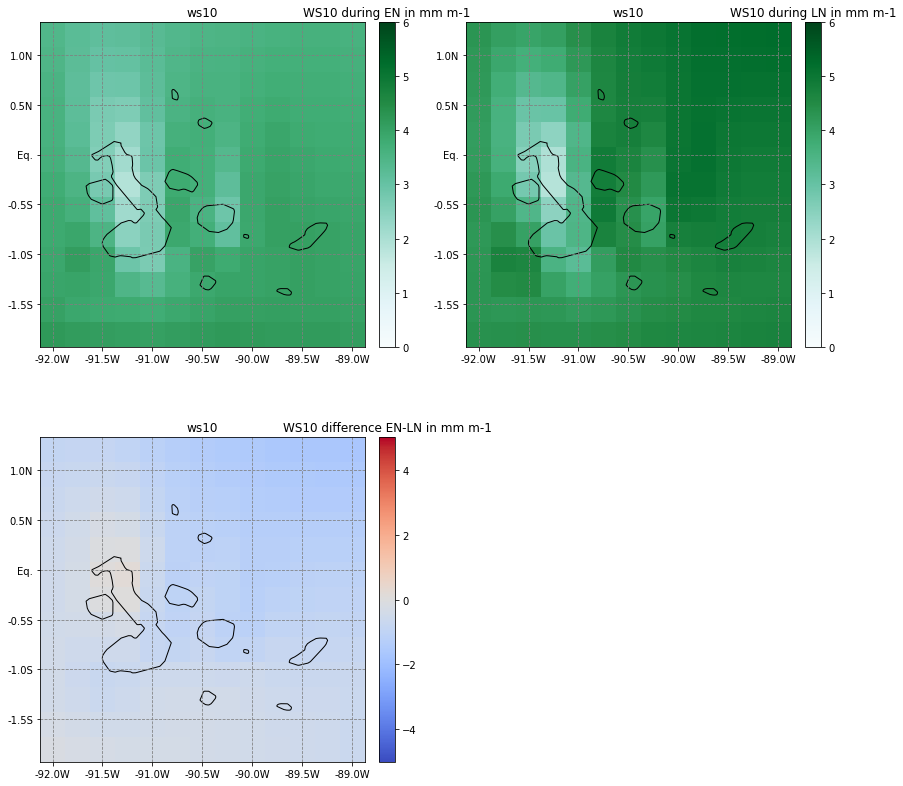

In [314]:
fig = plt.figure(figsize=(14,14))
fig.add_subplot(2, 2, 1)
ds.ws10[12*4-3:12*5, :, :].mean('time').salem.quick_map(
    cmap='BuGn',
    vmax=6,
    vmin=0
)
plt.title("WS10 during EN in ms-1")
fig.add_subplot(2, 2, 2)
ds.ws10[12*28-3:12*29, :, :].mean('time').salem.quick_map(
    cmap='BuGn',
    vmax=6,
    vmin=0
)
plt.title("WS10 during LN in ms-1")
fig.add_subplot(2, 2, 3)
(ds.ws10[12*4-3:12*5, :, :].mean('time') - ds.ws10[12*28-3:12*29, :, :].mean('time')).salem.quick_map(
    cmap='coolwarm',
    vmax=5,
    vmin=-5
)
plt.title("WS10 difference EN-LN in ms-1")

Text(0.5, 1.0, 'u10 difference EN-LN in ms-1')

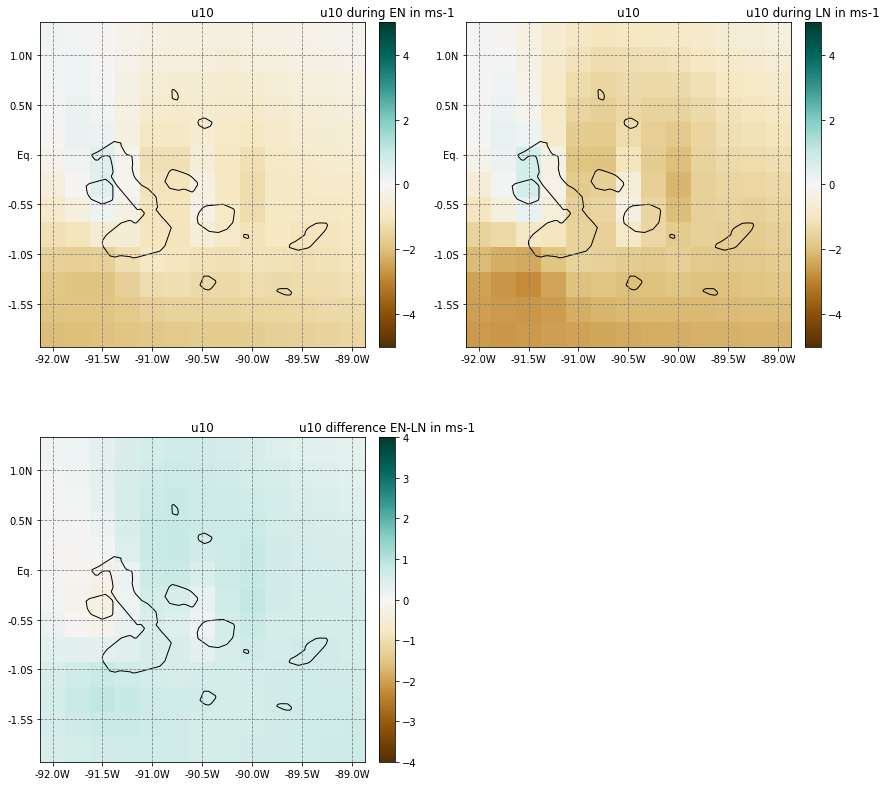

In [386]:
fig = plt.figure(figsize=(14,14))
fig.add_subplot(2, 2, 1)
ds.u10[12*4-3:12*5, :, :].mean('time').salem.quick_map(
    cmap='BrBG',
    vmax=5,
    vmin=-5
)
plt.title("u10 during EN in ms-1")
fig.add_subplot(2, 2, 2)
ds.u10[12*28-3:12*29, :, :].mean('time').salem.quick_map(
    cmap='BrBG',
    vmax=5,
    vmin=-5
)
plt.title("u10 during LN in ms-1")
fig.add_subplot(2, 2, 3)
(ds.u10[12*4-3:12*5, :, :].mean('time') - ds.u10[12*28-3:12*29, :, :].mean('time')).salem.quick_map(
    cmap='BrBG',
    vmax=4,
    vmin=-4
)
plt.title("u10 difference EN-LN in ms-1")

Text(0.5, 1.0, 'u10 difference EN-LN in ms-1')

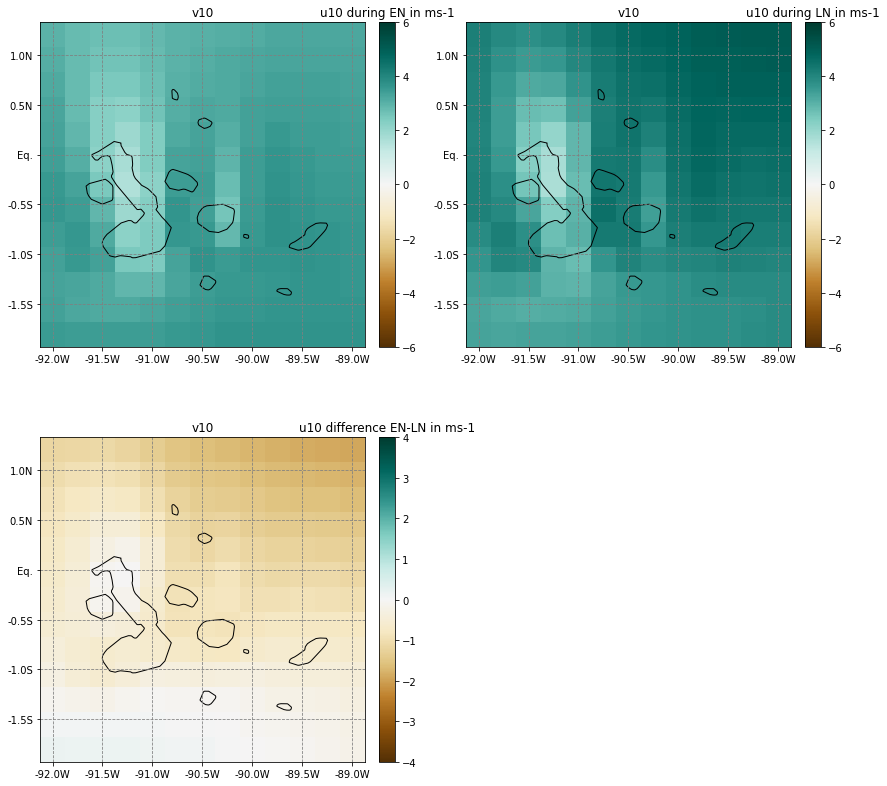

In [352]:
fig = plt.figure(figsize=(14,14))
fig.add_subplot(2, 2, 1)
ds.v10[12*4-3:12*5, :, :].mean('time').salem.quick_map(
    cmap='BrBG',
    vmax=6,
    vmin=-6
)
plt.title("u10 during EN in ms-1")
fig.add_subplot(2, 2, 2)
ds.v10[12*28-3:12*29, :, :].mean('time').salem.quick_map(
    cmap='BrBG',
    vmax=6,
    vmin=-6
)
plt.barbs(
    X, 
    Y, 
    ds.u10[12*28-3:12*29, :, :].mean('time').squeeze(), 
    ds.v10[12*28-3:12*29, :, :].mean('time').squeeze()
)
plt.title("u10 during LN in ms-1")
fig.add_subplot(2, 2, 3)
(ds.v10[12*4-3:12*5, :, :].mean('time') - ds.v10[12*28-3:12*29, :, :].mean('time')).salem.quick_map(
    cmap='BrBG',
    vmax=4,
    vmin=-4
)
plt.title("u10 difference EN-LN in ms-1")